In [93]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_classification

In [94]:
#Generate a synthetic dataset using scikit-learn's blob generator
X, y = make_classification(n_samples=500, n_features=3,
                            n_informative=3, n_redundant=0,
                           n_clusters_per_class=1, flip_y=0.1,
                           class_sep=1.0, random_state=40)


In [95]:
class SVM: #implementation of soft margin SVM
    def __init__(self, learning_rate=0.001, C=1, epochs=100):
        self.lr = learning_rate
        self.C = C
        self.epochs = epochs
        self.w = None
        self.b = None


    def fit(self, X, y):
        samples, features = X.shape
        batch_size = 20
        counter = 0
        self.w = np.zeros(features)
        self.b = 0
        array = np.zeros(self.epochs) # to store loss and plot against epochs

        # shuffling of data
        permutation = np.random.permutation(samples)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]
        for i in range(self.epochs):
            #mini-batch gradient descent
            for k in range(0, samples , batch_size):
                grad_W = np.zeros(features)
                grad_b = 0
                for index, X_i in enumerate(X_shuffled[counter:counter+batch_size]): #returns index and element
                    if (np.maximum(0, 1 - (y_shuffled[counter+index] * (np.dot(X_shuffled[counter+index], self.w) + self.b))) == 0):
                        grad_W = grad_W + self.w
                    else:
                        grad_W = self.w - self.C * np.dot(X_i, y_shuffled[counter+index])
                        grad_b = self.b - self.C * y_shuffled[counter+index]
                    self.w = self.w - self.lr * grad_W
                    self.b = self.b - self.lr * grad_b
            loss =  1/2 * np.dot(self.w,self.w.T) + self.C * np.mean(np.maximum(0, 1 - (y_shuffled * (np.dot(X_shuffled, self.w) + self.b))))
            array[i] = loss #to plot
        return array

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

if __name__ == "__main__":

    #1. Relabel the Y targets to +1/-1
    for i in range(len(y)):
      if y[i] == 1:
        y[i] = -1
      else:
        y[i] = 1

    #2. Split the dataset into training and testing datasets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    clf = SVM()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_train)

    score = 0
    for i in range(len(y_train)):
      if(y_pred[i] - y_train[i] == 0):
        score = score + 1
      else:
        pass
    print("The accuracy score for training dataset is: ",score/len(y_train))
    print("Optimal Weights", clf.w, clf.b)


The accuracy score for training dataset is:  0.8725
Optimal Weights [0.36571845 0.40219932 0.02162358] -0.05017255232307219


In [96]:
#Predictions on test data
y_pred_test = clf.predict(X_test)

score_test = 0
for i in range(len(y_test)):
  if(y_pred_test[i] - y_test[i] == 0):
    score_test = score_test + 1
  else:
    pass
#Acuracy Score
print("The accuracy score for testing dataset is: ",score_test/len(y_test))


The accuracy score for testing dataset is:  0.81


In [97]:
#storing weights in variables
w1 = clf.w[0]
w2 = clf.w[1]
w3 = clf.w[2]
b = clf.b

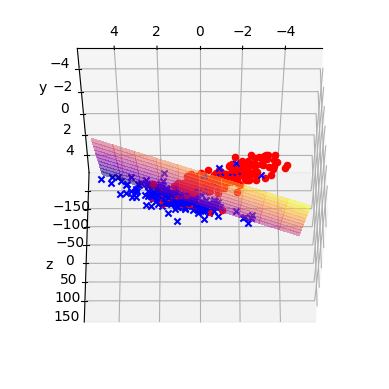

In [98]:
#Visualize the training data and decision boundary in 3D

x=np.linspace(-5,5,11)
y=np.linspace(-5,5,11)

X, Y = np.meshgrid(x,y)

Z = ( - w1 * X - w2*Y - b) / w3

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap="plasma", linewidth=0, antialiased=False, alpha=0.5)

#for plotting taking the coordinates in seperate variables
X1 = X_train[:, 0:1]
X2 = X_train[:, 1:2]
X3 = X_train[:, 2:3]

for i in range(400):
  if (y_train[i] == -1):
    ax.scatter3D(X1[i], X2[i], X3[i], c='r', marker='o', label='Data Points')
  else:
    ax.scatter3D(X1[i], X2[i], X3[i], c='b', marker='x', label='Data Points')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');
# rotation
ax.view_init(150, 90)
plt.savefig('3Dplot1.png',dpi=600)
plt.show()

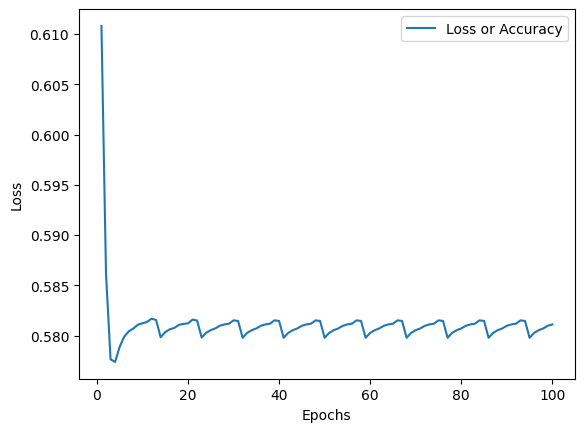

In [99]:
array = clf.fit(X_train, y_train)
epochs = np.arange(1, 100 + 1)

plt.plot(epochs, array, label='Loss or Accuracy')

# Adding labels and legend
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()